In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [3]:
def gen_data_iris():
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = iris.target
    return X, y

X, y = gen_data_iris()
print X.shape, y.shape

(150, 2) (150,)


In [5]:
h = 0.02
C = 1.
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

In [9]:
x_min, x_max = X[:, 0].min() - 1., X[:, 0].max() + 1.
y_min, y_max = X[:, 1].min() - 1., X[:, 1].max() + 1.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

print xx.shape, yy.shape

(220, 280) (220, 280)


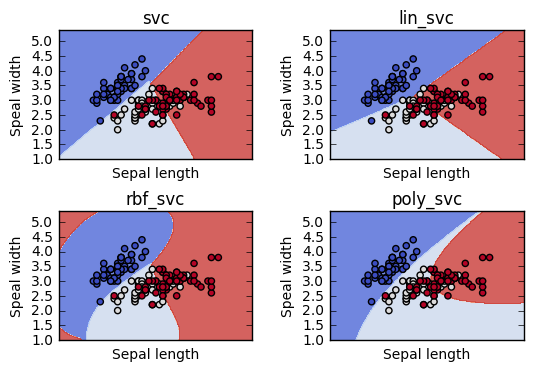

In [19]:
titles = ['svc', 'lin_svc', 'rbf_svc', 'poly_svc']
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Speal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.title(titles[i])

    
plt.show()

In [21]:
print Z.shape
from collections import Counter
print Counter(Z.ravel())

(220, 280)
Counter({0: 24491, 1: 20190, 2: 16919})


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def gen_data_2():
    h = 0.02
    xx, yy = np.meshgrid(np.arange(-1., 1., h), np.arange(-1., 1., h))
    zz = ((xx**2 + yy**2) > 0.25 and (xx**2 + yy**2) < 1.)
    zz = np.asarray(zz, dtype=int)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.show()
gen_data_2()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()